In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.mixture import GaussianMixture
import pickle

import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

<IPython.core.display.Javascript object>

In [3]:
data_5th = np.memmap('./radar_data_5th.dat', dtype='float32', mode='r',shape=(6242487,5))
data_6th = np.memmap('./radar_data_6th.dat', dtype='float32', mode='r',shape=(22608746,5))
data_combined = np.memmap('./radar_data_combined.dat', dtype='float32', mode='r',shape=(28851233,5))

<IPython.core.display.Javascript object>

Set number of components (I.E `k`)

In [33]:
n_components = np.arange(4, 18)

Train models

In [ ]:
%%time
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data_combined)
          for n in n_components]

Save models

In [30]:
filename = 'Sedgerly_GMM.sav'
pickle.dump(models, open(filename, 'wb'))

View models

In [29]:
models

[GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
         means_init=None, n_components=4, n_init=1, precisions_init=None,
         random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
         verbose_interval=10, warm_start=False, weights_init=None),
 GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
         means_init=None, n_components=5, n_init=1, precisions_init=None,
         random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
         verbose_interval=10, warm_start=False, weights_init=None),
 GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
         means_init=None, n_components=6, n_init=1, precisions_init=None,
         random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
         verbose_interval=10, warm_start=False, weights_init=None),
 GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
         means_init=None, n_components=7, n_init=1, precisions_init=None,


Plot AIC and BIC

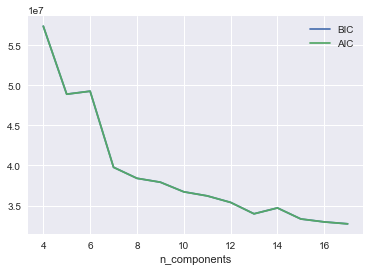

In [34]:
plt.plot(n_components, [m.bic(data_combined) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data_combined) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');